# FLOWER RECOGNITION: 
## DIFFERENT APPROACHES TO IMAGE CLASSIFICATION

### 1. Loading and preparing the data

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random

First I will load a single image and see to start visualy exploring the data without burdening the computer with the whole dataset at once. 

I will try to reduce image size and see if it is clear enough for the model to recognize them. It's important to not have images that are too big, but if we reduce too much the quality they will become too blurry to be of any use. 
For example, if we try with a size of 50, it is way too much reduction, but with 100x100 seems to be enough.

Anyway, the decision about the image size it's not yet definitive and might be subject to some fine tuning later in the process. 

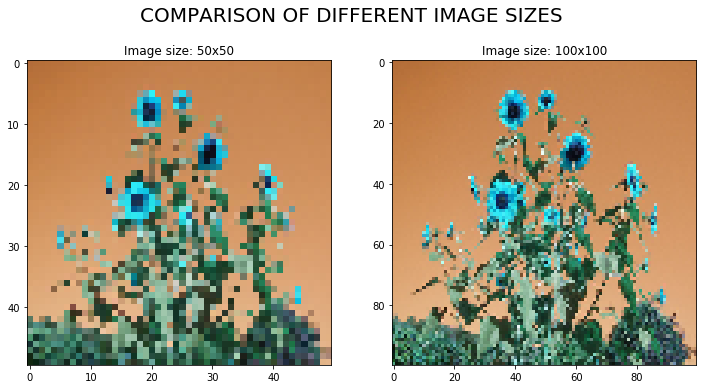

In [55]:
path = "/Users/Diego/Documents/GitHub/flower-recognition/data/Train/sunflower/" #Choose whatever path suitable
photo = "1788133737_b1133d1aa7.jpg" #just select manually an image to avoid problems with exceptions 

f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("COMPARISON OF DIFFERENT IMAGE SIZES", fontsize = 20)
ax[0].imshow(cv2.resize(cv2.imread(path + photo), (50, 50)))
ax[0].set_title("Image size: 50x50")
ax[1].imshow(cv2.resize(cv2.imread(path + photo), (100, 100)))
ax[1].set_title("Image size: 100x100")
plt.show()

#### 1.1. Creating a training dataset

Once we have decided what seems a good size for pictures, we will proceed to create the training and testing data separation. For this step, I won't follow a very scientific approach. I simply went into the different folders and moved the first 80 observations into the testing data. This represent about the 70% of the observations, although there are differents among flowers since some of them have more observations than others.
After this split has been already done, now we can proceed with the creation of our training dataset (~4000 total observations). To do so, I'll create a function using the structure that I showed in the beginning of the notebook. 

In [57]:
pic_size = 100
training = []
directory = "/Users/Diego/Documents/GitHub/flower-recognition/data/Train"
categories = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
def create_dataset():
    for category in categories:
        path = os.path.join(directory, category) #Iterate through everyone of the different folders
        class_index = categories.index(category)  #get numerical indexes for the categories of flower

        for pic in os.listdir(path):
            try:
                pic_array = cv2.imread(os.path.join(path,pic)) #create an array for every image
                new_array = cv2.resize(pic_array, (pic_size, pic_size)) #change the size of the image
                training.append([new_array, class_index])  # append every image to the training data frame
            except Exception as e:  
                pass
create_dataset() 


#### 1.2. Shuffling the data

In [60]:
for i in training[:10]:
    print(i[1])

0
0
0
0
0
0
0
0
0
0


Given the way our function is been created, the training will take place sequentially by categories. That is, first all daisies, then all dandelions, etc. This is a suboptimal way of learning.

To counter this, we will shuffle all the observations in our data set so that they appear in a more mixed way and not one after the other. To do this, we need to use the "shuffle" function inside the "random" package.

In [61]:
random.shuffle(training)

In [62]:
for i in training[:10]: # Take the first 10 observations
    print(i[1]) # Print only the label column

0
3
4
1
4
3
4
2
0
1


Now it can be observed that the data it has actually been shuffled.

#### 1.3. Final pre-processing

In order to facilitate the process of inputing data into our models, let's separate our data set into two different lists with dependent and independent variables respectively. 

In [63]:
x = []
y = []

for dependent, independent in training:
    x.append(dependent)
    y.append(independent)